<a href="https://colab.research.google.com/github/DOXDEF/DOXDEF_Main/blob/main/NONOGRAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2021-12-21 10:14:55--  https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FATOKW%2Fbtrorl81wQK%2FUH74EY52a8G75CmMr8bOYk%2Fimg.png
Resolving img1.daumcdn.net (img1.daumcdn.net)... 23.202.34.144, 23.202.34.136, 2600:1417:e800::b81a:7f08, ...
Connecting to img1.daumcdn.net (img1.daumcdn.net)|23.202.34.144|:443... connected.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.



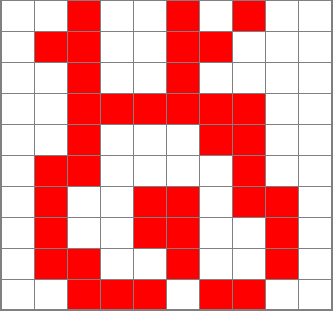

In [ ]:
import numpy as np
import cv2, torch
from google.colab.patches import cv2_imshow

!wget -c 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FATOKW%2Fbtrorl81wQK%2FUH74EY52a8G75CmMr8bOYk%2Fimg.png' -O 'nonogram.jpg'

nonogram = cv2.imread('nonogram.jpg')
cv2_imshow(nonogram)

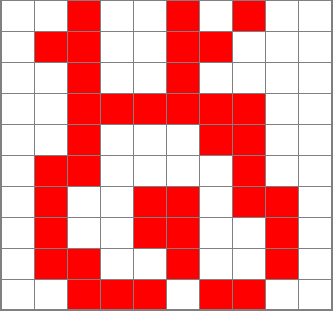

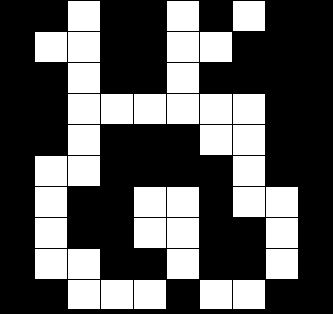

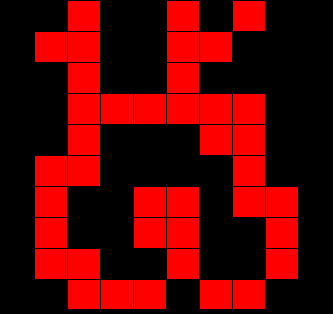

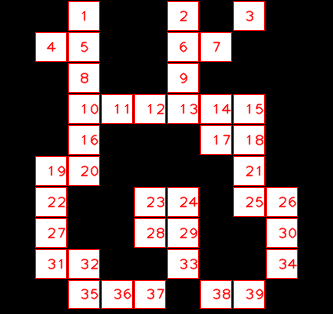

In [ ]:
img_color = cv2.imread('nonogram.jpg') 
height, width = img_color.shape[:2]
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV) 
lower_red = (0, 255, 255) 
upper_red = (0, 255, 255) 
img_mask = cv2.inRange(img_hsv, lower_red, upper_red) 
img_result = cv2.bitwise_and(img_color, img_color, mask = img_mask)

cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(img_mask)

dst = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

for i in range(1, cnt):
    (x, y, w, h, area) = stats[i]

    cv2.putText(dst, str(i), (x + w // 2 - 5, y + h // 2 + 5), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 1, cv2.LINE_AA)
    cv2.rectangle(dst, (x, y, w, h), (0, 0, 255))

cv2_imshow(img_color) 
cv2_imshow(img_mask) 
cv2_imshow(img_result) 
cv2_imshow(dst)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [ ]:
num = 1
print("row")
count = 1
row = 1
for i in range(1, (cnt - 1)):
  if (stats[i][1] != row):
    print(0)
    row += 31
  if(stats[i][1] == stats[i+1][1]):
      if (stats[i][0] + 33 == stats[i+1][0]):
        count+=1
      else:
        print(count, end = ' ')
        count = 1
  else:
   print(count)
   count = 1
   num+=1
   if (stats[i][1] == row):
    row += 31
print(count)
if (num < 10):
  print(0)
print("=========")
print("column")
num = 1
count = 1
column = 2
stats = stats[stats[:, 1].argsort(kind='mergesort')]
stats = stats[stats[:, 0].argsort(kind='mergesort')]  
for i in range(1, (cnt - 1)):
  if (stats[i][0] != column):
    print(0)
    num+=1
    column += 33
  if(stats[i][0] == stats[i+1][0]):
      if (stats[i][1] + 31 == stats[i+1][1]):
        count+=1
      else:
        print(count, end = ' ')
        count = 1
  else:
   print(count)
   count = 1
   num+=1
   if (stats[i][0] == column):
    column += 33
print(count)
if (num < 10):
  print(0)


row
1 1 1
2 2
1 1
6
1 2
2 1
1 2 2
1 2 1
2 1 1
3 2
column
0
1 4
6 2
1 1
1 2 1
4 3
1 2 1
1 4 1
3
0
